<a href="https://colab.research.google.com/github/leovelani/classificacao_email/blob/main/Tema_6_Classifica%C3%A7%C3%A3o_de_Emails_como_Spam_ou_N%C3%A3o_Spam_Usando_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes é um algoritmo de classificação probabilístico baseado no Teorema de Bayes, usado para prever a categoria de um dado com base em probabilidades calculadas a partir de dados anteriores. No contexto da classificação de e-mails como spam ou não spam, utilizamos o modelo Multinomial Naive Bayes.

A principal diferença entre o Naive Bayes padrão e o Multinomial Naive Bayes está na forma como eles tratam os dados de entrada. O Naive Bayes padrão é mais genérico e pode ser aplicado a dados contínuos ou categóricos, enquanto o Multinomial é especialmente projetado para lidar com dados discretos, como contagens de palavras em um texto.

Escolhemos o Multinomial Naive Bayes porque o problema envolve dados textuais, onde o foco está na frequência das palavras em cada e-mail. Este modelo calcula a probabilidade de uma mensagem ser spam ou não com base nas ocorrências das palavras, aproveitando-se da estrutura dos dados para oferecer alta precisão e eficiência.

Essa abordagem é ideal para filtragem de spam, pois leva em conta a relevância estatística de cada palavra no contexto de e-mails de spam e não spam, mantendo a simplicidade e a rapidez no processamento.

Primeiro passo:

Carregar o dataset e analisar as colunas e como ele foi construido.Além de obter informações sobre as colunas.

In [ ]:
import pandas as pd

# Carregar o dataset
file_path = '/content/spam_ham_dataset.csv'
df = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset
print(df.head())

# Exibir informações sobre o dataset
print(df.info())

# Exibir estatísticas descritivas para entender melhor os dados
print(df.describe())


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None
        Unnamed: 0    label_num
count  5171.000000  5171.00000

Explicação das colunas:

label: Esta coluna indica se o e-mail é "spam" ou "ham". "Spam" refere-se a e-mails indesejados, geralmente de natureza publicitária ou fraudulenta. "Ham" refere-se a e-mails legítimos que não são spam.

text: Esta coluna contém o conteúdo real do e-mail. É o texto que será analisado para determinar se o e-mail é spam ou ham.

label_num: Esta coluna é a versão numérica da coluna "label", onde "spam" é geralmente codificado como 1 e "ham" como 0. Essa codificação é útil para alimentar os dados em modelos de machine learning, que geralmente trabalham melhor com valores numéricos.

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

# Verificar entradas duplicadas
print(f"Entradas duplicadas: {df.duplicated().sum()}")


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64
Entradas duplicadas: 0


Análise de Valores Faltantes e Duplicados:
É importante verificar se existem valores faltantes ou duplicados, que podem impactar a qualidade do modelo.


label
ham     3672
spam    1499
Name: count, dtype: int64


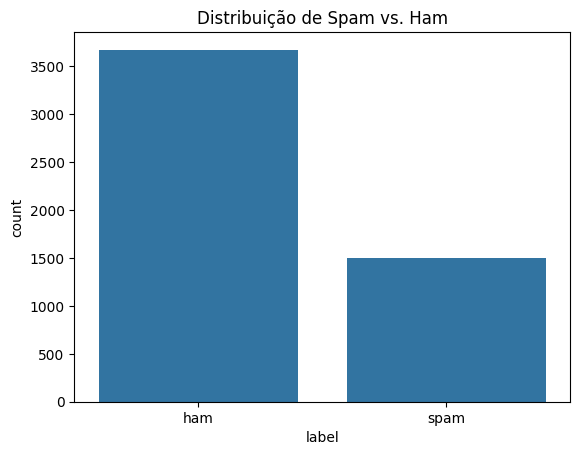

In [ ]:
# Distribuição de spam e ham
print(df['label'].value_counts())

# Visualizar graficamente a distribuição
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Distribuição de Spam vs. Ham')
plt.show()


Entender a distribuição das classes (spam vs. ham) é essencial para avaliar o balanceamento do dataset.

O modelo precisa de mais instâncias de "Ham" para aprender melhor as características dos e-mails "normais" e diferenciá-los do "Spam". Como o objetivo é que ele consiga reconhecer o que é típico em um e-mail legítimo, ter uma maior quantidade de "Ham" no dataset permite ao Naive Bayes identificar padrões comuns, como certas palavras e estruturas de texto que aparecem em mensagens não indesejadas.

Se o dataset tivesse mais "Spam" do que "Ham", o modelo poderia ficar "acostumado" a classificar qualquer e-mail como spam, levando a muitos falsos positivos. Portanto, uma boa representação de "Ham" é essencial para que o modelo aprenda a diferenciar com mais precisão e segurança o que é um e-mail legítimo.

Para entender melhor o conteúdo do dataset e as características específicas dos e-mails de cada categoria, decidimos separar e exibir as palavras mais comuns em e-mails "Ham" e "Spam". Essa separação permite identificar padrões linguísticos únicos de cada classe. Em e-mails de spam, certas palavras tendem a aparecer com maior frequência, como termos promocionais ou de urgência ("ganhe", "promoção", "grátis"). Já em e-mails "Ham", observamos uma prevalência de termos neutros e contextuais, comuns em comunicações legítimas.

Esse processo é importante pois ajuda o modelo a reconhecer as palavras e estruturas que caracterizam cada tipo de e-mail, reforçando o aprendizado do Naive Bayes. Ao conhecer as palavras típicas em "Spam" e "Ham", o modelo consegue distinguir melhor os e-mails legítimos daqueles que são potencialmente indesejados, aumentando a precisão e a confiabilidade na classificação.

In [ ]:
from collections import Counter
import re

def get_top_n_words(corpus, n=20):
    words = ' '.join(corpus).lower()
    words = re.findall(r'\w+', words)
    return Counter(words).most_common(n)

# Palavras mais comuns em e-mails de spam
spam_words = df[df['label'] == 'spam']['text']
print("Palavras mais comuns em spam:")
print(get_top_n_words(spam_words))

# Palavras mais comuns em e-mails ham
ham_words = df[df['label'] == 'ham']['text']
print("Palavras mais comuns em ham:")
print(get_top_n_words(ham_words))


Palavras mais comuns em spam:
[('the', 7254), ('to', 5160), ('and', 4903), ('of', 4490), ('a', 3787), ('in', 3129), ('you', 2794), ('for', 2523), ('this', 2283), ('is', 2256), ('your', 1946), ('subject', 1657), ('with', 1470), ('that', 1348), ('s', 1324), ('be', 1303), ('or', 1302), ('on', 1264), ('3', 1239), ('_', 1218)]
Palavras mais comuns em ham:
[('the', 18359), ('to', 15172), ('ect', 13897), ('for', 7982), ('and', 7912), ('hou', 7281), ('enron', 6555), ('subject', 6403), ('on', 6049), ('a', 6026), ('of', 5677), ('you', 5365), ('i', 5241), ('is', 4906), ('this', 4878), ('in', 4570), ('2000', 4308), ('be', 3757), ('will', 3441), ('that', 3419)]


Após a analisar os resultados das palavras mais comuns, percebemos que o data-set possui muitas stop-words.

Stopwords são palavras comuns que aparecem com muita frequência em textos, mas geralmente não carregam muito significado específico. Exemplos de stopwords em português são "o", "a", "de", "para", "em", "é" e "mas". Em inglês, exemplos incluem "the", "is", "and", "to", "in".

Remover as stopwords ajuda a reduzir o ruído nos dados e a melhorar a eficiência e precisão do modelo, pois ele passa a se basear em palavras que realmente contribuem para diferenciar o contexto de cada e-mail.

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Baixar pacotes necessários
nltk.download('punkt')
nltk.download('stopwords')

# Definir stopwords e stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Função de pré-processamento
def preprocess_text(text):
    text = text.lower()  # Minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Remover pontuação
    words = word_tokenize(text)  # Tokenização
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remover stopwords e aplicar stemming
    return ' '.join(words)

# Aplicar a função ao dataset
df['processed_text'] = df['text'].apply(preprocess_text)

# Verificar o resultado
print(df[['text', 'processed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  \
0  Subject: enron methanol ; meter # : 988291\r\n...   
1  Subject: hpl nom for january 9 , 2001\r\n( see...   
2  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3  Subject: photoshop , windows , office . cheap ...   
4  Subject: re : indian springs\r\nthis deal is t...   

                                      processed_text  
0  subject enron methanol meter 988291 follow not...  
1  subject hpl nom januari 9 2001 see attach file...  
2  subject neon retreat ho ho ho around wonder ti...  
3  subject photoshop window offic cheap main tren...  
4  subject indian spring deal book teco pvr reven...  


O pré-processamento dos textos dos e-mails é crucial para garantir que o modelo funcione bem. Aqui, aplicamos várias etapas:

*Conversão para minúsculas:* Para evitar diferenciação de palavras iguais apenas por letras maiúsculas ou minúsculas.

*Remoção de pontuação:* Pontuações como vírgulas e pontos não são úteis para a análise de texto em muitos casos.

*Tokenização:* Dividimos o texto em palavras separadas (tokens).

*Remoção de stopwords:* Stopwords são palavras muito comuns que não agregam muito significado, como "de", "e", "o", "para".

*Stemming: *Reduzimos as palavras à sua raiz, o que significa que diferentes formas de uma palavra (por exemplo, "playing" e "played") são tratadas da mesma forma



Oque é o TF-IDF?:

Term Frequency (TF): Conta a frequência com que uma palavra aparece em um documento específico. Quanto mais uma palavra aparece em um documento, maior é o seu peso nesse documento. No entanto, essa contagem sozinha não é suficiente, pois algumas palavras comuns podem aparecer em muitos documentos sem agregar muito significado.

Inverse Document Frequency (IDF): Pondera o valor de cada palavra pela sua "raridade" em todos os documentos do conjunto de dados. Palavras que aparecem em muitos documentos recebem um peso menor (pois são menos informativas), enquanto palavras raras ganham um peso maior.

A fórmula do IDF é :

IDF(t)=log((Número de documentos)/(Número de documentos contendo a palavra t))


TF-IDF Score: O produto do TF e do IDF. Esse valor é o peso final que representa a relevância de uma palavra em um documento específico. Uma palavra com alto TF-IDF em um documento é tanto frequente nesse documento quanto relativamente rara nos demais, o que a torna importante para diferenciar o contexto daquele documento.

O TF-IDF foi utilizado neste projeto porque fornece uma forma eficaz de representar o texto de maneira numérica, capturando a importância relativa das palavras em cada e-mail. Essa representação é particularmente útil para algoritmos de classificação de texto, como o Naive Bayes, que assume independência entre as características e utiliza contagens ou frequências de palavras para calcular probabilidades.

Com o TF-IDF, o Naive Bayes pode aproveitar uma matriz que enfatiza palavras significativas (que ajudam a diferenciar "Spam" de "Ham") e reduz o peso de palavras comuns que aparecem em quase todos os e-mails, evitando o viés que poderia surgir se fosse usada apenas a contagem simples de palavras. Isso resulta em uma classificação mais precisa e eficiente, pois o modelo é capaz de focar nas palavras mais relevantes para distinguir entre os tipos de e-mail.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Adicione stopwords específicas (exemplo: palavras comuns em e-mails que não ajudam na classificação)
custom_stopwords = [
    "subject", "re", "fw", "click", "unsubscribe", "dear",
    "the", "to", "and", "of", "a", "in", "for", "this", "is", "your", "with",
    "that", "be", "on", "or", "will", "3", "_", "2000", "i"
]  # Adicione mais palavras se necessário

# Definir o vetor de TF-IDF com bigramas e stopwords personalizadas
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words=custom_stopwords)

# Transformar os textos com o TF-IDF atualizado
X = vectorizer.fit_transform(df['processed_text'])



Palavras comuns como "the", "to", "and", "of": São comuns em qualquer texto e não ajudam na diferenciação.

Palavras específicas de e-mails: Palavras como "subject", "re", "fw", "click", "unsubscribe" são típicas de e-mails, mas podem aparecer tanto em spam quanto em ham, portanto, têm pouco valor discriminatório.


Stopwords Personalizadas: Ao adicionar uma lista de palavras que são irrelevantes para o modelo, você ajuda a remover palavras que não contribuem para a distinção entre "Spam" e "Ham".

Bigramas: Configurando ngram_range=(1, 2), você está pedindo ao TfidfVectorizer para considerar não apenas palavras individuais (unigramas), mas também pares de palavras consecutivas (bigramas). Isso ajuda a capturar frases comuns em spam, como "ganhe grátis" ou "oferta exclusiva".

In [ ]:
from sklearn.model_selection import train_test_split

# Definir as etiquetas (label_num é 0 para ham e 1 para spam)
y = df['label_num']

# Divisão dos dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# Instanciar o balanceador SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE ao conjunto de treino
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)



SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de oversampling que cria novas instâncias sintéticas para a classe minoritária, ajudando a balancear o dataset. Oversampling, de forma geral, aumenta o número de exemplos na classe menos representada (neste caso, spam), reduzindo o desbalanceamento.

Usamos SMOTE para que o modelo tenha mais exemplos de spam no treinamento, melhorando sua capacidade de reconhecer padrões dessa classe e reduzindo a chance de classificar spam incorretamente como e-mails legítimos (ham).

Utilizamos a função train_test_split da biblioteca sklearn.model_selection para dividir o dataset em dois subconjuntos: conjunto de treino e conjunto de teste.

Conjunto de Treino (80%): Essa parte dos dados é utilizada para treinar o modelo, ou seja, para que ele aprenda a identificar padrões entre as variáveis (neste caso, as características TF-IDF dos e-mails) e suas respectivas classes (ham ou spam).

Conjunto de Teste (20%): Essa parte é reservada e utilizada apenas depois do treinamento, para avaliar o desempenho do modelo em dados que ele ainda não viu. Isso ajuda a verificar a capacidade de generalização do modelo, ou seja, o quão bem ele consegue classificar novos e-mails que não foram utilizados no treinamento.

Parâmetros
test_size=0.2: Define que 20% dos dados serão alocados para o conjunto de teste e 80% para o conjunto de treino. Essa proporção é comumente utilizada para garantir que o conjunto de treino seja suficientemente grande para que o modelo aprenda bem, mas sem comprometer uma boa avaliação com o conjunto de teste.

random_state=42: Garante que a divisão dos dados seja reproduzível. Isso significa que, ao rodar o código várias vezes, a divisão será sempre a mesma. Definir um valor para random_state é útil para manter a consistência dos resultados, especialmente em experimentos que precisam ser replicados.

Importância da Divisão
Dividir os dados entre treino e teste é uma prática essencial para evitar o problema de overfitting (quando o modelo "memoriza" o conjunto de treino e tem dificuldade em generalizar para dados novos).

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inicializar o classificador Naive Bayes
model = MultinomialNB()

# Treinar o modelo com o conjunto de dados balanceado
model.fit(X_train_balanced, y_train_balanced)

MultinomialNB()

Usamos o classificador Multinomial Naive Bayes, que é eficiente para a classificação de texto, como no problema de identificar spam. O Multinomial Naive Bayes é uma versão específica do Naive Bayes que funciona bem com dados de contagem, como o TF-IDF. Neste código, o modelo é treinado com os dados de treino, aprendendo a diferenciar padrões nas palavras usadas em e-mails "spam" e "ham"

# **Avaliação do Modelo:**

Accuracy: 0.9710144927536232

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       742
           1       0.92      0.99      0.95       293

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.97      0.97      0.97      1035



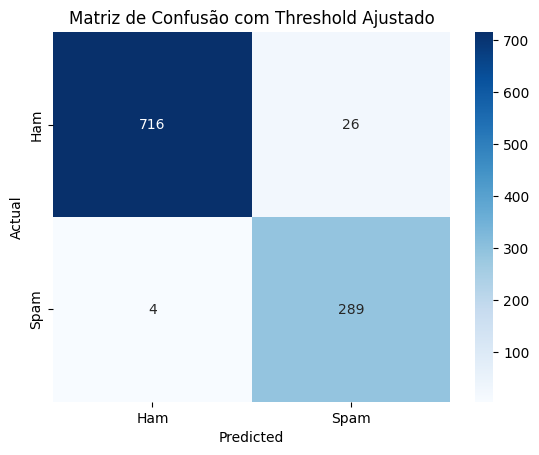

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obter as probabilidades de previsão para a classe "Spam"
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe "Spam" (1)

# Ajustar o threshold para a classificação
threshold = 0.4  # Ajuste o valor do threshold conforme necessário
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Calcular as métricas com o threshold ajustado
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))

# Matriz de confusão com o threshold ajustado
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Plot da matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão com Threshold Ajustado')
plt.show()



 modelo apresentou um excelente desempenho com o threshold ajustado para 0,4. O threshold é o valor limite usado pelo modelo para determinar se uma previsão pertence à classe "spam" ou "ham". No caso deste modelo, se a probabilidade de um e-mail ser spam for maior ou igual a 0,4, ele será classificado como spam; caso contrário, será classificado como ham (legítimo).

Com este ajuste, o modelo alcançou uma acurácia de 97%, identificando corretamente a maioria dos e-mails, sejam eles legítimos (ham) ou spam. O recall para spam foi de 99%, o que significa que quase todos os e-mails de spam foram detectados, com apenas 4 e-mails de spam classificados incorretamente como legítimos. Houve, no entanto, um pequeno aumento nos falsos positivos (26 e-mails legítimos classificados como spam).

Esse trade-off é considerado aceitável, já que o objetivo principal é capturar a maior quantidade possível de spams, minimizando a perda de mensagens legítimas. Em geral, o modelo está bem ajustado, garantindo uma alta taxa de detecção de spam e equilibrando precisão e recall de forma eficaz.

Previsão: Depois que o modelo é treinado, fazemos previsões nos dados de teste (os 20% que o modelo nunca viu). Isso nos permite avaliar o quão bem ele funciona em novos dados.

In [ ]:
# Matriz de confusão com o threshold ajustado
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)


Matriz de Confusão: Mostra o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Esta matriz ajuda a visualizar onde o modelo está errando (por exemplo, quantos spams ele não detectou corretamente).

A Curva ROC (Receiver Operating Characteristic) é uma ferramenta gráfica para avaliar o desempenho de um classificador binário, como o modelo de Naive Bayes para detectar e-mails spam. A curva mostra a relação entre o True Positive Rate (taxa de verdadeiros positivos ou sensibilidade) e o False Positive Rate (taxa de falsos positivos) para diferentes valores de threshold.

A AUC (Área sob a Curva) representa a área total sob a Curva ROC e fornece uma única métrica para avaliar o desempenho do modelo. Um valor de AUC próximo de 1 indica que o modelo tem uma excelente capacidade de separação entre as classes (neste caso, "Spam" e "Ham"). Quanto maior o AUC, melhor o modelo consegue distinguir entre e-mails legítimos e spam.

Essas métricas são especialmente úteis porque permitem avaliar o desempenho do modelo para diferentes thresholds, o que ajuda a encontrar um equilíbrio entre a detecção de spams e a minimização de falsos positivos.

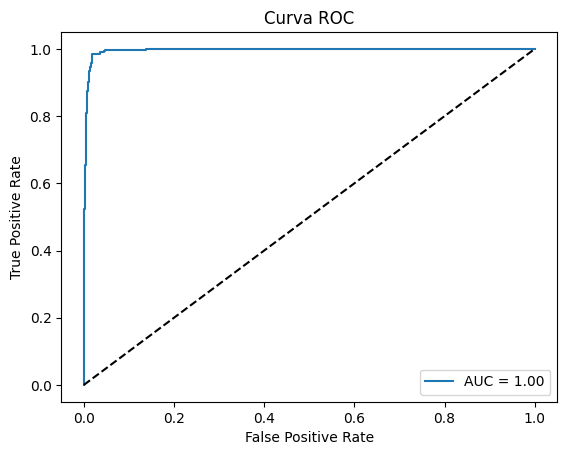

AUC: 1.00


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades de predição (necessário para a curva ROC)
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotar a curva ROC
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc_score:.2f}")




A Curva ROC apresentada mostra um desempenho excelente do modelo, com um valor de AUC de 1.00. Isso indica que o modelo é capaz de distinguir perfeitamente entre as classes "Spam" e "Ham" em todas as taxas de threshold, atingindo uma taxa de verdadeiros positivos (True Positive Rate) próxima de 1 enquanto mantém a taxa de falsos positivos (False Positive Rate) perto de 0.

Esse resultado sugere que o modelo tem uma altíssima capacidade de separação entre e-mails legítimos e spams, tornando-o muito confiável para detectar spam com precisão.

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar K-fold Cross Validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Mostrar as médias das métricas
print(f"Cross-validated Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


Cross-validated Accuracy: 0.87 (+/- 0.01)


Para melhorar a robustez da avaliação do modelo, podemos adicionar K-fold Cross Validation, que avalia o modelo em várias partições do conjunto de dados.

In [ ]:
from sklearn.metrics import accuracy_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Exibir a taxa de acerto como porcentagem
print(f"Taxa de acerto do modelo: {accuracy * 100:.2f}%")


Taxa de acerto do modelo: 97.87%


a taxa de acerto reflete a proporção de e-mails que o modelo conseguiu classificar corretamente como spam ou ham (não spam) em relação ao total de e-mails que foram analisados.

A acurácia mede quantos e-mails foram corretamente identificados como spam (verdadeiros positivos) e quantos e-mails foram corretamente identificados como não spam (ham) (verdadeiros negativos).

Ela também leva em conta as previsões incorretas:

Falsos Positivos (FP): E-mails legítimos (não spam) que foram incorretamente
classificados como spam.

Falsos Negativos (FN): E-mails de spam que foram incorretamente classificados como não spam.

A acurácia é afetada pela proporção de previsões corretas versus incorretas. Uma alta acurácia indica que o modelo é eficiente na classificação correta dos e-mails.